# Read Mapping Analysis
#### *Tools to map reads, parse and interpret read files*

## About
[TO_DO]

## Requirements:
**For module: **
- re ``2.2.1``
- pandas ``0.22.0``
- LAST ``962`` (``lastal`` and ``maf-convert``)
- samtools `1.8`

*(Note: The ``map_tools`` module calls ``lastal``, ``maf-convert`` and ``samtools`` directly, as if they were on your PATH. You can modify lines `7, 8, 9` to specify alternative paths.)*

**For notebook:**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from minilamp import map_tools

## Data checklist:
- Reference genomes ``db`` paths (pre built with ``lastdb``)
- Sequence reads in ``fastq`` or ``fasta`` format.

## Data load:

In [9]:
# genome lastdb
genomes_dir = '/Users/nquinones/Documents/projects/PQEI/Data/genomes/'
DENV1db = genomes_dir + 'DENV1/DENV1db/DENV1db'

In [35]:
# positive control read
control_dir = '/Users/nquinones/Documents/projects/PQEI/Data/control_reads/'
control_ref = control_dir + 'run20150508_dengue_d1control_d1primer_2d.fastq'

# Use

In [57]:
def read_out(out):
    df = map_tools.parse_sam('{}.sam'.format(out))
    
    df['I_p'] = df['I']/df['len']
    df['D_p'] = df['D']/df['len']
    df['M_p'] = df['M']/df['len']
    df['H_p'] = df['H']/df['len']

    
    return df

In [58]:
file = './simulated_data/simulated_c1_v1.fasta'
forma = 'fasta'
db = DENV1db
out = './simulated_data/simulated_c1_v1'

map_tools.master_cmd(db, file, forma, out)

In [63]:
out = './simulated_data/simulated_c1_v1'
df1 = read_out(out)

In [32]:
file = './simulated_data/simulated_c1_v2.fasta'
forma = 'fasta'
db = DENV1db
out = './simulated_data/simulated_c1_v2'

map_tools.master_cmd(db, file, forma, out)

In [64]:
out = './simulated_data/simulated_c1_v2'
df2 = read_out(out)

In [38]:
file = control_ref
forma = 'fastq'
db = DENV1db
out = './control_maps/c1'

map_tools.master_cmd(db, file, forma, out)

In [65]:
out = './control_maps/c1'
df3 = read_out(out)

### Control vs. simulation V1

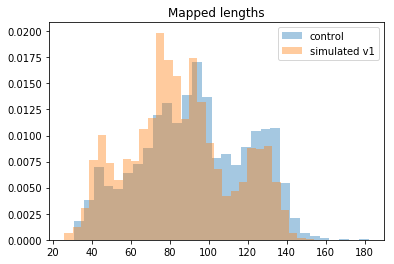

Control avg.: 93.03761574074075
Sim V1 avg.: 85.38472063854049
Sim V2 avg.: 85.38472063854049


In [105]:
plt.hist(df3['len'], bins=30, alpha = 0.4, label='control', normed=True)
plt.hist(df1['len'], bins=30, alpha = 0.4, label='simulated v1', normed=True)
#plt.hist(df2['len'], bins=30, alpha = 0.2, label='simulated v2', normed=True)

plt.title('Mapped lengths')
plt.legend()
plt.show()

print('Control avg.: {}'.format(df3['len'].mean()))
print('Sim V1 avg.: {}'.format(df1['len'].mean()))
print('Sim V2 avg.: {}'.format(df1['len'].mean()))

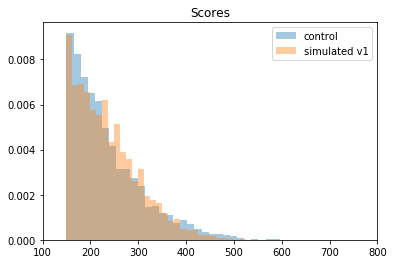

Control avg.: 234.94965277777777
Sim V1 avg.: 235.35359179019383
Sim V2 avg.: 260.08393524283935


In [103]:
plt.hist(df3['AS'], bins=30, alpha = 0.4, label='control', normed=True)
plt.hist(df1['AS'], bins=30, alpha = 0.4, label='simulated v1', normed=True)
#plt.hist(df2['AS'], bins=30, alpha = 0.4, label='simulated v2', normed=True)

plt.title('Scores')
plt.xlim(100, 800)
plt.legend()
plt.show()

print('Control avg.: {}'.format(df3['AS'].mean()))
print('Sim V1 avg.: {}'.format(df1['AS'].mean()))
print('Sim V2 avg.: {}'.format(df2['AS'].mean()))

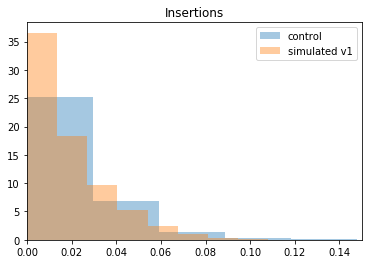

Control V1 avg.: 0.01884094892847475
Control V1 avg.: 0.016489264556373957
Sim avg.: 1.7026225769669328


In [102]:
plt.hist(df3['I_p'], bins=10, alpha = 0.4, label='control', normed=True)
plt.hist(df1['I_p'], bins=10, alpha = 0.4, label='simulated v1', normed=True)
#plt.hist(df2['I_p'], bins=10, alpha = 0.4, label='simulated v2', normed=True)

plt.title('Insertions')
plt.xlim(0, 0.15)
plt.legend()
plt.show()

print('Control V1 avg.: {}'.format(df3['I_p'].mean()))
print('Control V1 avg.: {}'.format(df2['I_p'].mean()))
print('Sim avg.: {}'.format(df1['I'].mean()))

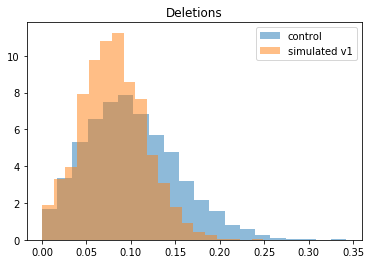

Control avg.: 0.10054131774519066
Sim V1 avg.: 0.08046023184004915
Sim V2 avg.: 0.0738466521550704


In [95]:
plt.hist(df3['D_p'], bins=20, alpha = 0.5, label='control', normed=True)
plt.hist(df1['D_p'], bins=20, alpha = 0.5, label='simulated v1', normed=True)
#plt.hist(df2['D_p'], bins=20, alpha = 0.4, label='simulated v2', normed=True)

plt.title('Deletions')
plt.legend()
plt.show()

print('Control avg.: {}'.format(df3['D_p'].mean()))
print('Sim V1 avg.: {}'.format(df1['D_p'].mean()))
print('Sim V2 avg.: {}'.format(df2['D_p'].mean()))

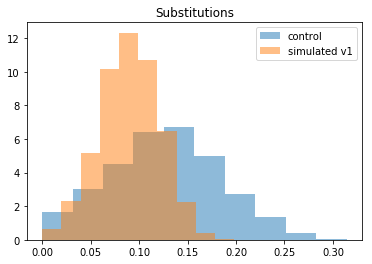

Control avg.: 0.1267781623443151
Sim V1 avg.: 0.08992698121552892
Sim V2 avg.: 0.07781922448080279


In [98]:
plt.hist(df3['M_p'], bins=10, alpha = 0.5, label='control', normed=True)
plt.hist(df1['M_p'], bins=10, alpha = 0.5, label='simulated v1', normed=True)
#plt.hist(df2['M_p'], bins=10, alpha = 0.4, label='simulated v2', normed=True)

plt.title('Substitutions')
plt.legend()
plt.show()

print('Control avg.: {}'.format(df3['M_p'].mean()))
print('Sim V1 avg.: {}'.format(df1['M_p'].mean()))
print('Sim V2 avg.: {}'.format(df2['M_p'].mean()))

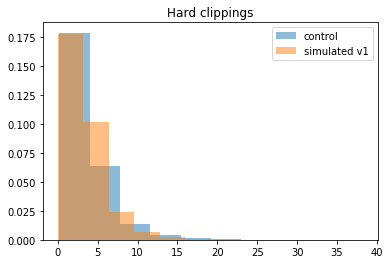

Control avg.: 3.6968945053177387
Sim V1 avg.: 3.504707433095026
Sim V2 avg.: 3.647032554353743


In [101]:
plt.hist(df3['H_p'], bins=10, alpha = 0.5, label='control', normed=True)
plt.hist(df1['H_p'], bins=10, alpha = 0.5, label='simulated v1', normed=True)
#plt.hist(df2['H_p'], bins=10, alpha = 0.4, label='simulated v2', normed=True)

plt.title('Hard clippings')
plt.legend()
plt.show()

print('Control avg.: {}'.format(df3['H_p'].mean()))
print('Sim V1 avg.: {}'.format(df1['H_p'].mean()))
print('Sim V2 avg.: {}'.format(df2['H_p'].mean()))